# Contraste de hipótesis - AB testing (Ejercicios)

Basándose en el siguiente conjuntos de datos

```python
!wget https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv
```

estudie si existe diferencia significativa de media en los siguientes casos:



1.   Balance:
  * Meses impares (A) contra meses pares (B).
  * Estado civil `'marital'` (A) contra `'single'` (B).
  * Trabajo `'unemployed'` (A) contra `'technician'` (B).
  * Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B).
  * Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B).
2.   Variable `'duration'`:
  * Meses impares (A) contra meses pares (B).
  * Estado civil `'marital'` (A) contra `'single'` (B).
  * Trabajo `'unemployed'` (A) contra `'technician'` (B).
  * Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B).
  * Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B).

Haga un análisis detallado cuando proceda.


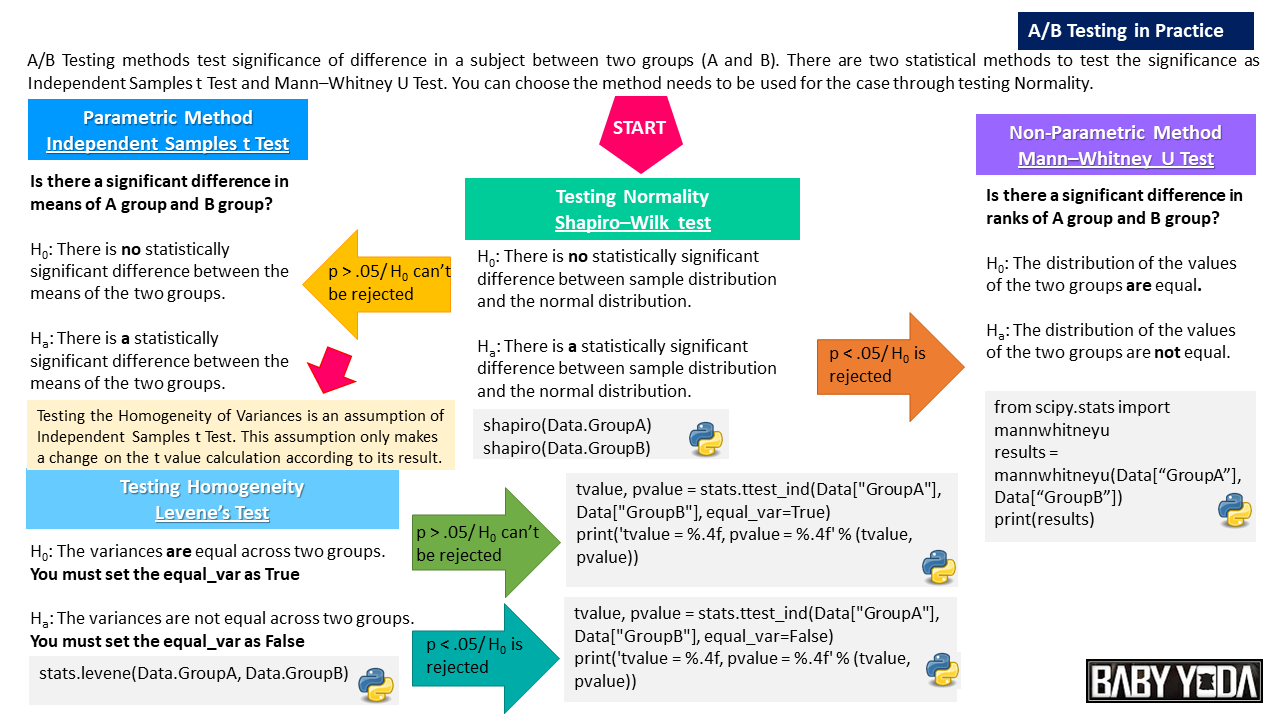

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
!wget https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv

--2022-06-30 18:36:03--  https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918960 (897K) [text/plain]
Saving to: ‘bank.csv’

bank.csv            100%[===================>] 897.42K  --.-KB/s    in 0.009s  

2022-06-30 18:36:03 (100 MB/s) - ‘bank.csv’ saved [918960/918960]



In [4]:
data = pd.read_csv('/content/bank.csv')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Meses impares (A) contra meses pares (B).

# Balance

In [6]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [7]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

impares_A = data.loc[data['month'].isin(['jan','mar','may','jul','sep','nov']),'balance']
pares_B= data.loc[data['month'].isin(['feb','apr','jun','aug','oct','dec']),'balance']
MW_test = mannwhitneyu(pares_B, impares_A,alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 1.3038963622958427e-17


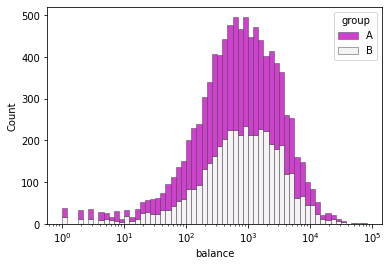

In [8]:

import seaborn as sns

data['group'] = data['month'].apply(lambda x: 'A' if x in ['jan','mar','may','jul','sep','nov'] else 'B')
sns.histplot(
    data.loc[data['balance']>0,:],
    x="balance", hue="group",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

# Duration

In [9]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

impares_A = data.loc[data['month'].isin(['jan','mar','may','jul','sep','nov']),'duration']
pares_B= data.loc[data['month'].isin(['feb','apr','jun','aug','oct','dec']),'duration']
MW_test = mannwhitneyu(pares_B, impares_A,alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.16141887580789582


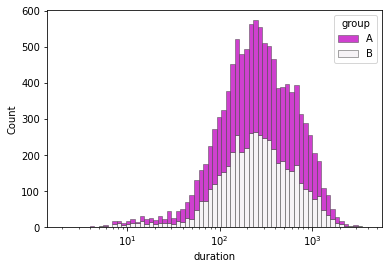

In [10]:
import seaborn as sns

data['group'] = data['month'].apply(lambda x: 'A' if x in ['jan','mar','may','jul','sep','nov'] else 'B')
sns.histplot(
    data.loc[data['duration']>0,:],
    x="duration", hue="group",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

## Estado civil 'marital' (A) contra 'single' (B).

# Balance

In [ ]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

casados = data[data['marital'] == 'married']['balance']
solteros= data[data['marital'] == 'single']['balance']
MW_test = mannwhitneyu(casados,solteros, alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.24390290787797742


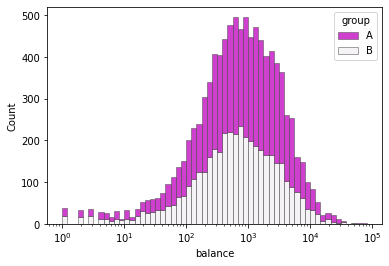

In [ ]:
import seaborn as sns

data['group'] = data['marital'].apply(lambda x: 'A' if x in ['married'] else 'B')
sns.histplot(
data.loc[data['balance']>0,:],
x="balance", hue="group",
multiple="stack",
palette="light:m_r",
edgecolor=".3",
linewidth=.5,
log_scale=True,
)

# Duration

In [11]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

casados = data[data['marital'] == 'married']['duration']
solteros= data[data['marital'] == 'single']['duration']
MW_test = mannwhitneyu(casados,solteros, alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 1.59603520959153e-06


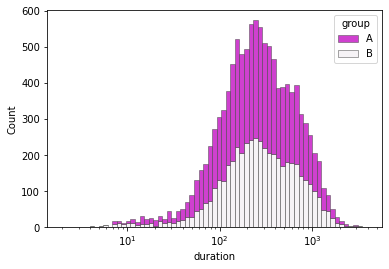

In [12]:
import seaborn as sns

data['group'] = data['marital'].apply(lambda x: 'A' if x in ['married'] else 'B')
sns.histplot(
data.loc[data['duration']>0,:],
x="duration", hue="group",
multiple="stack",
palette="light:m_r",
edgecolor=".3",
linewidth=.5,
log_scale=True,
)

## Trabajo 'unemployed' (A) contra 'technician' (B).

# Balance

In [ ]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
group_A = data[data['job'] == 'unemployed']['balance']
group_B = data[data['job'] == 'technician']['balance']

In [ ]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

group_A = data[data['job'] == 'unemployed']['balance']
group_B = data[data['job'] == 'technician']['balance']
MW_test = mannwhitneyu(group_A,group_B,alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.3781649181263925


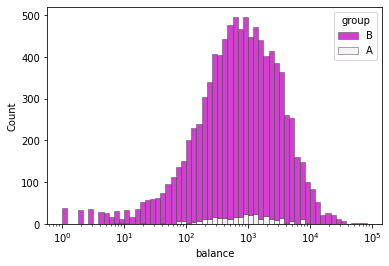

In [14]:
import seaborn as sns

data['group'] = data['job'].apply(lambda x: 'A' if x in ['unemployed'] else 'B')
sns.histplot(
data.loc[data['balance']>0,:],
x="balance", hue="group",
multiple="stack",
palette="light:m_r",
edgecolor=".3",
linewidth=.5,
log_scale=True,
)

# Duration

In [ ]:
group_A = data[data['job'] == 'unemployed']['duration']
group_B = data[data['job'] == 'technician']['duration']

In [15]:

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

group_A = data[data['job'] == 'unemployed']['duration']
group_B = data[data['job'] == 'technician']['duration']
MW_test = mannwhitneyu(group_A,group_B,alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.00018430469554587536


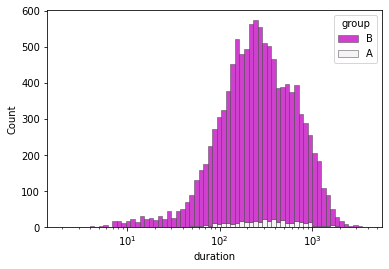

In [16]:
import seaborn as sns

data['group'] = data['job'].apply(lambda x: 'A' if x in ['unemployed'] else 'B')
sns.histplot(
data.loc[data['duration']>0,:],
x="duration", hue="group",
multiple="stack",
palette="light:m_r",
edgecolor=".3",
linewidth=.5,
log_scale=True,
)

## Duración por debajo de la media de dicha variable (A) contra por encima de la media de dicha variable (B).

# Balance

In [ ]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

group_A = data[data["balance"] < data["balance"].mean()]["balance"]
group_B = data[data["balance"] > data["balance"].mean()]["balance"]
MW_test = mannwhitneyu(group_A,group_B,alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


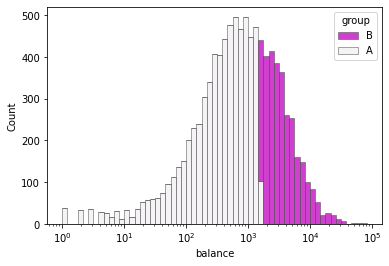

In [27]:
data['group'] = data['balance'].apply(lambda x: np.where(x < data['balance'].mean(), 'A',
                                                        np.where(x > data['balance'].mean(), 'B', 'C')))

sns.histplot(
    data.loc[(data['balance']>0) & (data['group'].isin(['A','B'])),:],
    x="balance",
    hue="group",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True
)

# Duration

In [17]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

group_A = data[data["duration"] < data["duration"].mean()]["duration"]
group_B = data[data["duration"] > data["duration"].mean()]["duration"]
MW_test = mannwhitneyu(group_A,group_B,alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


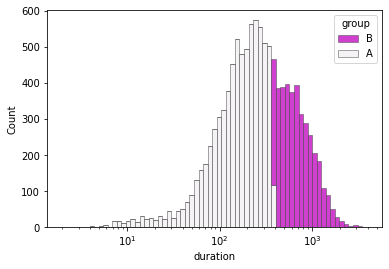

In [28]:
data['group'] = data['duration'].apply(lambda x: np.where(x < data['duration'].mean(), 'A',
                                                        np.where(x > data['duration'].mean(), 'B', 'C')))

sns.histplot(
    data.loc[(data['duration']>0) & (data['group'].isin(['A','B'])),:],
    x="duration",
    hue="group",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True
)

## Variable campaign por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B).

# Balance

In [23]:
data['campaign'].value_counts().head()

1    4798
2    3028
3    1321
4     771
5     378
Name: campaign, dtype: int64

In [24]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

group_A = data[data["campaign"] < data["campaign"].median()]["balance"]
group_B = data[data["campaign"] > data["campaign"].median()]["balance"]
MW_test = mannwhitneyu(group_A,group_B,alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0003796358426966597


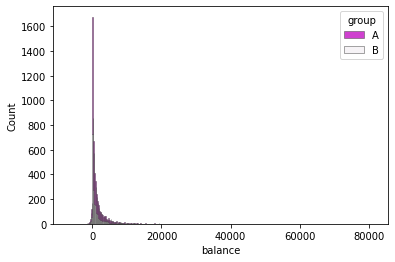

In [31]:
data['group'] = data['campaign'].apply(lambda x: np.where(x < data['campaign'].median(), 'A',
                                                        np.where(x > data['campaign'].median(), 'B', 'C')))

sns.histplot(
    data.loc[(data['campaign']>0) & (data['group'].isin(['A','B'])),:],
    x="balance",
    hue="group",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False
    # la escala logarítmica da error porque sale infinito
)

# Duration

In [21]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

group_A = data[data["campaign"] < data["campaign"].median()]["duration"]
group_B = data[data["campaign"] > data["campaign"].median()]["duration"]
MW_test = mannwhitneyu(group_A,group_B,alternative='two-sided')

print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {MW_test.pvalue}")

El p-valor obtenido en el test de Shapiro-Wilk es de 5.346959241475873e-06


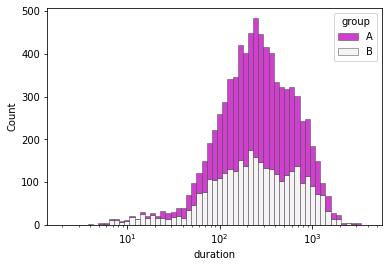

In [32]:
data['group'] = data['campaign'].apply(lambda x: np.where(x < data['campaign'].median(), 'A',
                                                        np.where(x > data['campaign'].median(), 'B', 'C')))

sns.histplot(
    data.loc[(data['campaign']>0) & (data['group'].isin(['A','B'])),:],
    x="duration",
    hue="group",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True
)